In [1]:
import torch
from sklearn.datasets import load_digits


# 手書き文字データをロード
digits = load_digits()
X = digits.data
Y = digits.target
X = torch.Tensor(X)
Y = torch.LongTensor(Y)

In [2]:
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader


# TensorDatasetはTensorしか受け取れない(つまりVariableは受け取れないようになっている)
ds = TensorDataset(X, Y)
# 64個づつデータをシャッフルされた状態で返すDataLoaderをつくる
# つまり下記のDataLoaderはミニバッチを作っている
loader = DataLoader(ds, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [3]:
from torch.autograd import Variable as V


losses = []
for epoch in range(10):
    running_loss = 0.0
    for x, y in loader:
        # x, yは1イテレートごとに64個のデータが回ってくる
        x = V(x)
        y = V(y)
        y_pred = net(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    losses.append(running_loss)

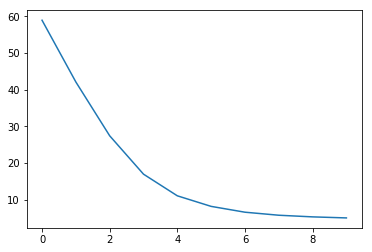

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(losses)